# **DATA UNDERSTANDING**

In [1]:
import numpy as np
import pandas as pd
# Import and read dataset
df = pd.read_csv('/kaggle/input/teel-industry-data/Steel_industry_datasets.csv')
df.head(5)

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [2]:
df.shape

(35040, 11)

In [3]:
df.dtypes

date                                     object
Usage_kWh                               float64
Lagging_Current_Reactive.Power_kVarh    float64
Leading_Current_Reactive_Power_kVarh    float64
CO2(tCO2)                               float64
Lagging_Current_Power_Factor            float64
Leading_Current_Power_Factor            float64
NSM                                       int64
WeekStatus                               object
Day_of_week                              object
Load_Type                                object
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [5]:
df.describe()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


In [6]:
df.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')

In [7]:
numerical =  df.select_dtypes(include=[np.number])
numerical.columns

Index(['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM'],
      dtype='object')

In [8]:
categorical = df.select_dtypes(exclude=[np.number])
categorical.columns

Index(['date', 'WeekStatus', 'Day_of_week', 'Load_Type'], dtype='object')

In [9]:
df.rename(columns = {'Lagging_Current_Reactive.Power_kVarh':'Lagging_Current_Reactive'}, inplace = True)
df.rename(columns = {'CO2(tCO2)':'co2'}, inplace = True)

# **EDA & DATA VISUALIZATION**

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


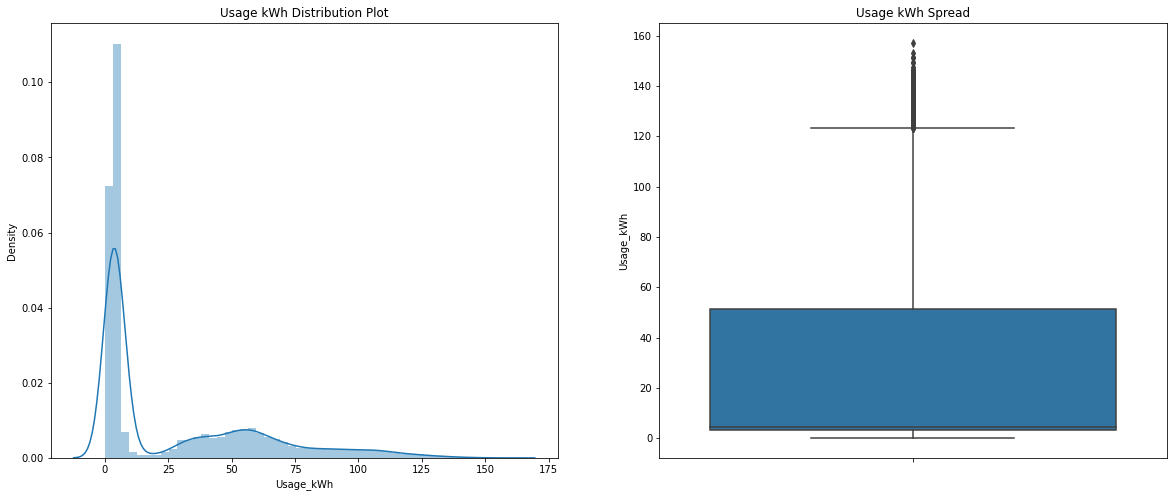

In [10]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Usage kWh Distribution Plot')
sns.distplot(df.Usage_kWh)

plt.subplot(1,2,2)
plt.title('Usage kWh Spread')
sns.boxplot(y=df.Usage_kWh)

plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


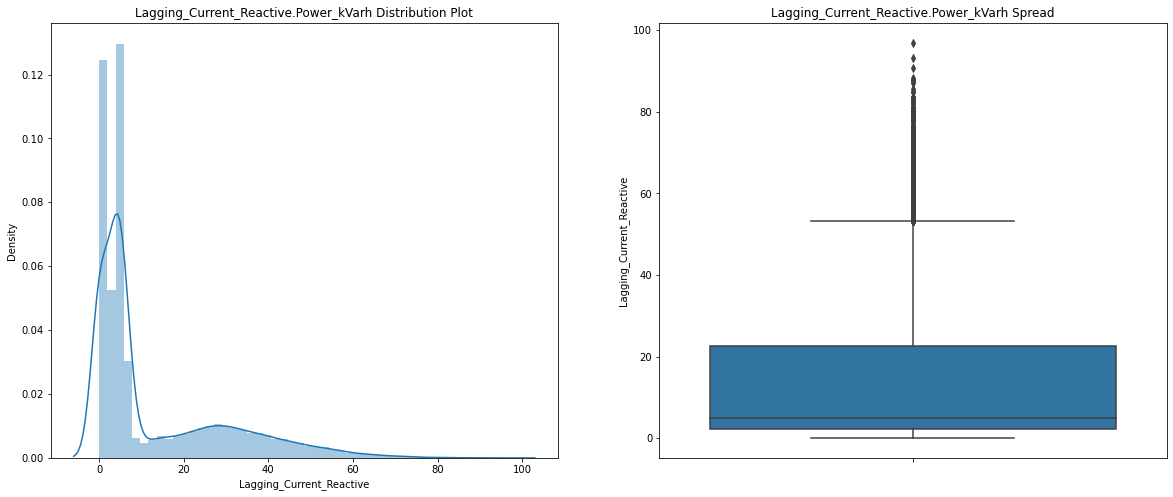

In [11]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Lagging_Current_Reactive.Power_kVarh Distribution Plot')
sns.distplot(df.Lagging_Current_Reactive)

plt.subplot(1,2,2)
plt.title('Lagging_Current_Reactive.Power_kVarh Spread')
sns.boxplot(y=df.Lagging_Current_Reactive)

plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


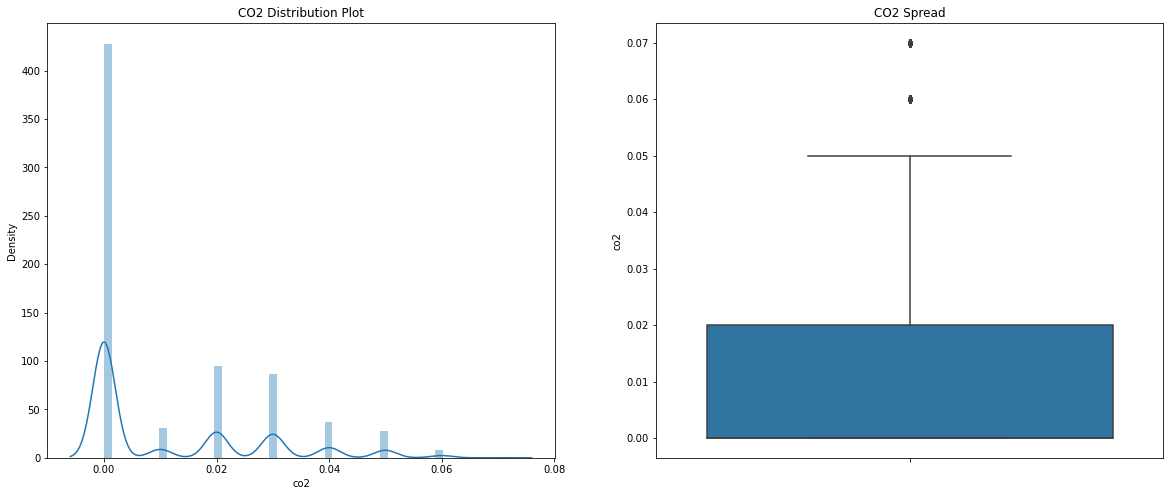

In [12]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('CO2 Distribution Plot')
sns.distplot(df.co2)

plt.subplot(1,2,2)
plt.title('CO2 Spread')
sns.boxplot(y=df.co2)

plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


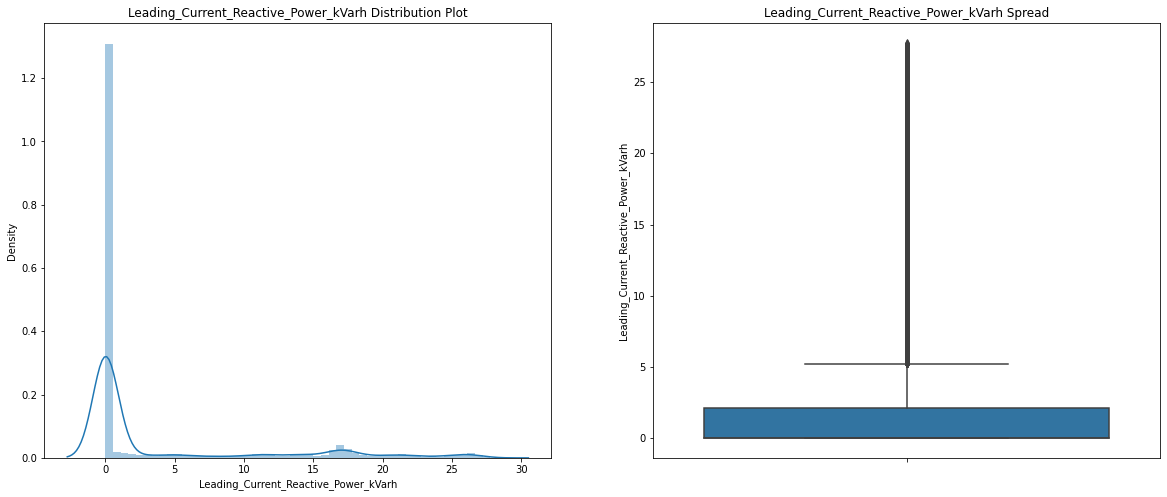

In [13]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Leading_Current_Reactive_Power_kVarh Distribution Plot')
sns.distplot(df.Leading_Current_Reactive_Power_kVarh)

plt.subplot(1,2,2)
plt.title('Leading_Current_Reactive_Power_kVarh Spread')
sns.boxplot(y=df.Leading_Current_Reactive_Power_kVarh)

plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


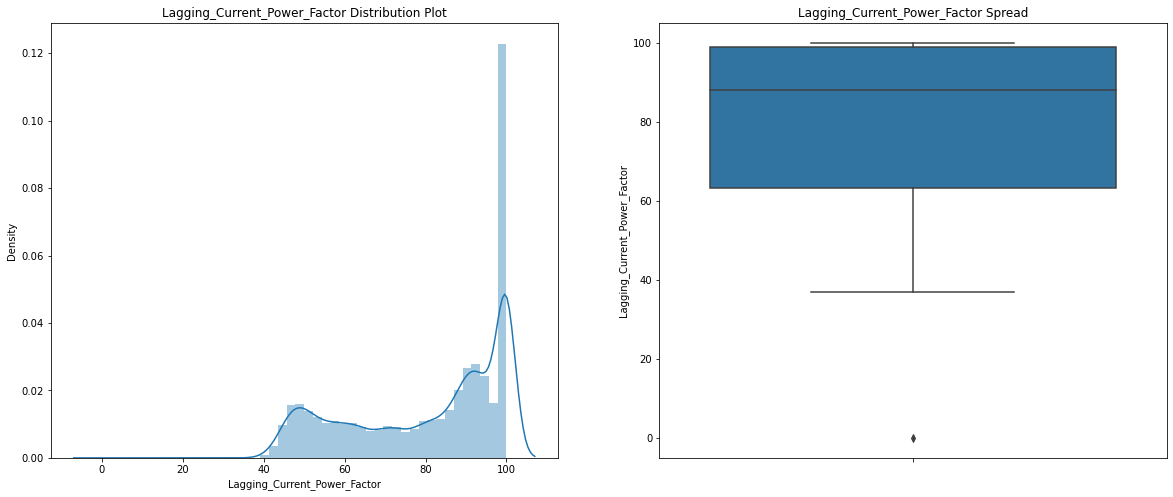

In [14]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Lagging_Current_Power_Factor Distribution Plot')
sns.distplot(df.Lagging_Current_Power_Factor)

plt.subplot(1,2,2)
plt.title('Lagging_Current_Power_Factor Spread')
sns.boxplot(y=df.Lagging_Current_Power_Factor)

plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


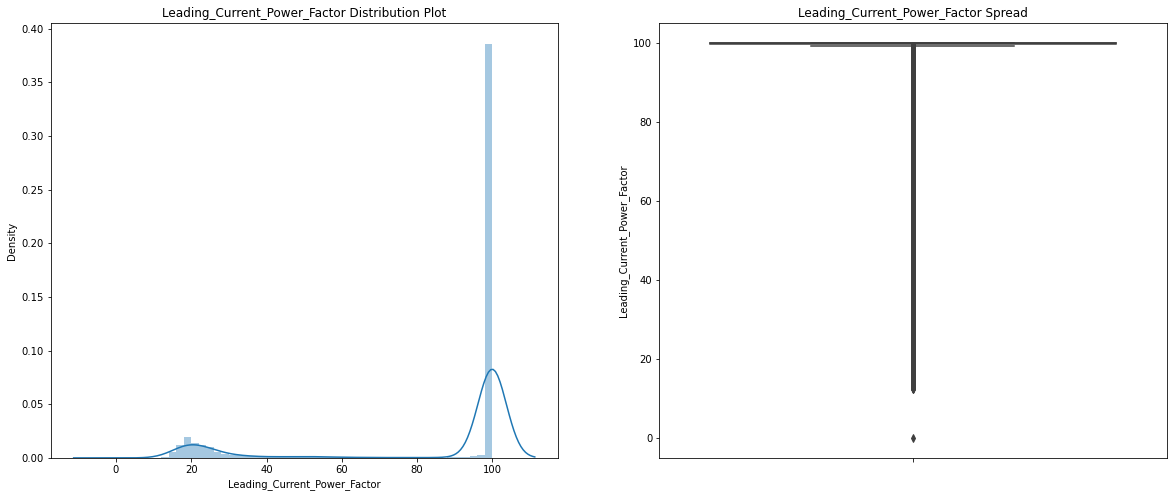

In [15]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Leading_Current_Power_Factor Distribution Plot')
sns.distplot(df.Leading_Current_Power_Factor)

plt.subplot(1,2,2)
plt.title('Leading_Current_Power_Factor Spread')
sns.boxplot(y=df.Leading_Current_Power_Factor)

plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


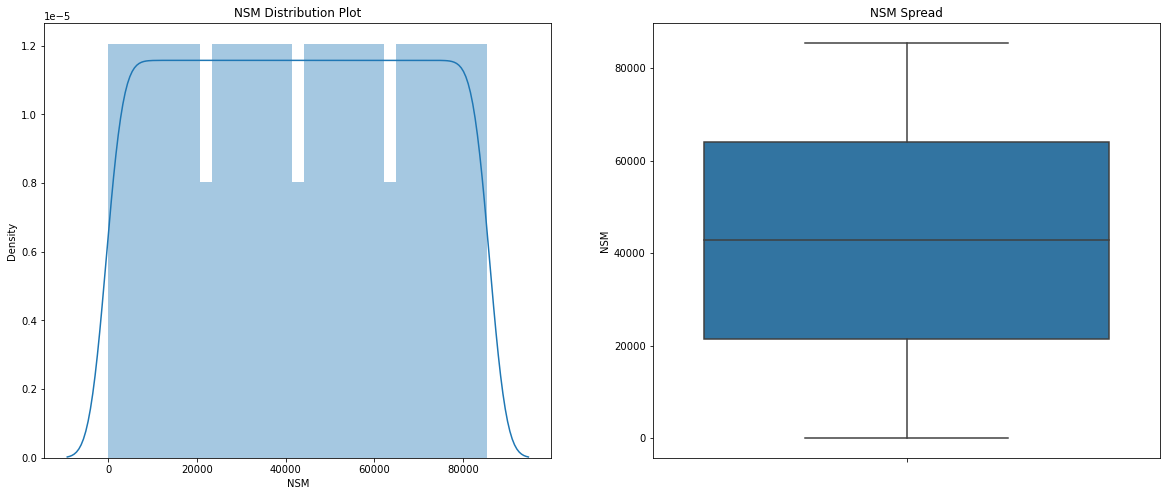

In [16]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('NSM Distribution Plot')
sns.distplot(df.NSM)

plt.subplot(1,2,2)
plt.title('NSM Spread')
sns.boxplot(y=df.NSM)

plt.show()

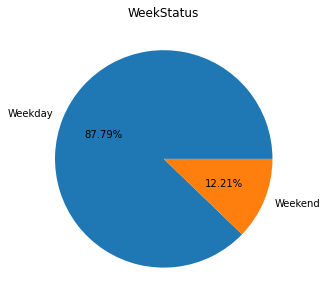

Weekday    25056
Weekend     9984
Name: WeekStatus, dtype: int64

In [17]:
df_pie=df.groupby(['WeekStatus'])['Usage_kWh'].sum().reset_index()
plt.figure(figsize=(5,5))
plt.title('WeekStatus')
plt.pie(df_pie['Usage_kWh'], labels= df_pie['WeekStatus'],autopct='%1.2f%%',)
plt.show()

categorical.WeekStatus.value_counts()

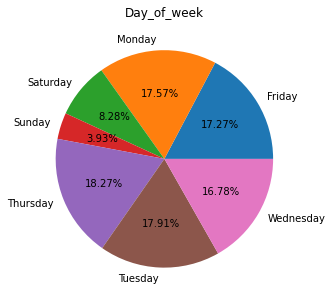

Monday       5088
Tuesday      4992
Wednesday    4992
Thursday     4992
Friday       4992
Saturday     4992
Sunday       4992
Name: Day_of_week, dtype: int64

In [18]:
df_pie=df.groupby(['Day_of_week'])['Usage_kWh'].sum().reset_index()
plt.figure(figsize=(5,5))
plt.title('Day_of_week')
plt.pie(df_pie['Usage_kWh'], labels= df_pie['Day_of_week'],autopct='%1.2f%%',)
plt.show()

categorical.Day_of_week.value_counts()

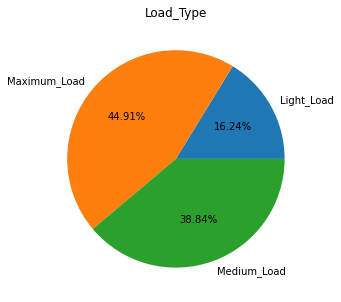

Monday       5088
Tuesday      4992
Wednesday    4992
Thursday     4992
Friday       4992
Saturday     4992
Sunday       4992
Name: Day_of_week, dtype: int64

In [19]:
df_pie=df.groupby(['Load_Type'])['Usage_kWh'].sum().reset_index()
plt.figure(figsize=(5,5))
plt.title('Load_Type')
plt.pie(df_pie['Usage_kWh'], labels= df_pie['Load_Type'],autopct='%1.2f%%',)
plt.show()

categorical.Day_of_week.value_counts()

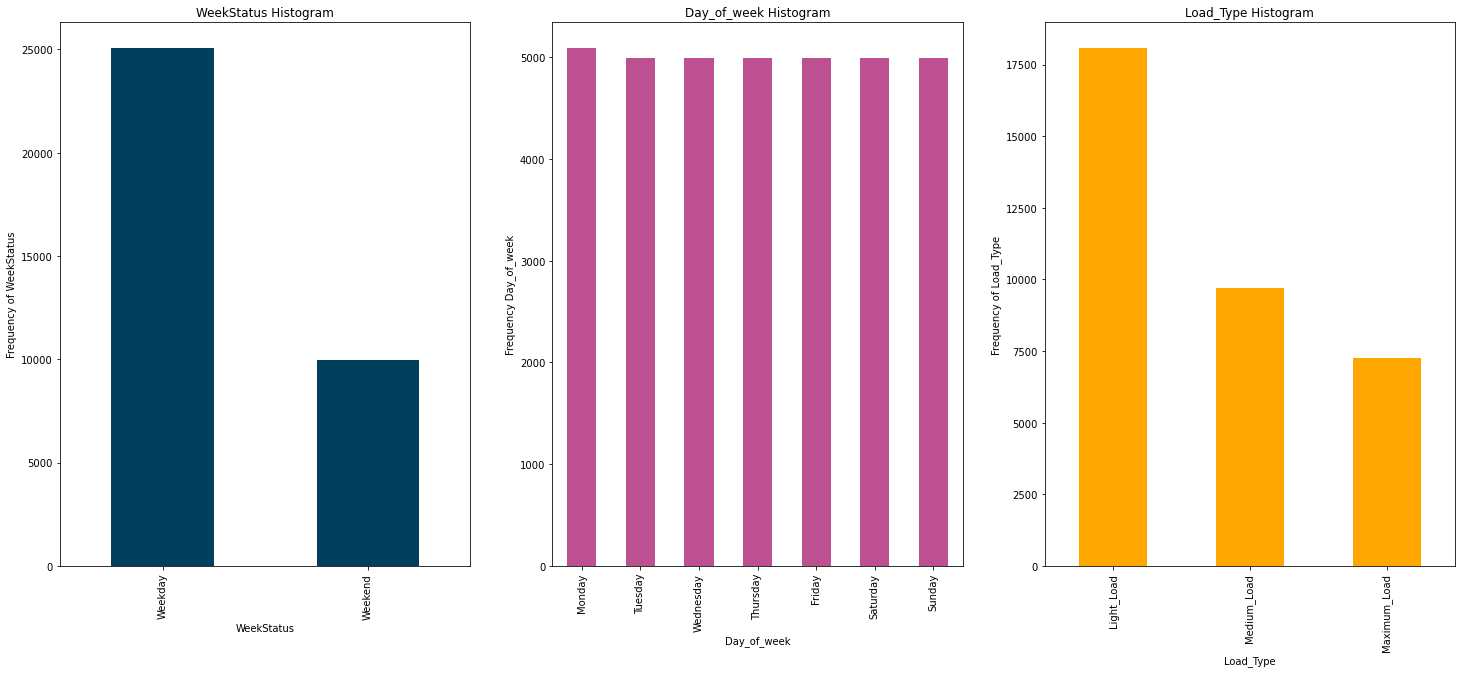

In [20]:
plt.figure(figsize=(25, 10))

plt.subplot(1,3,1)
plt1 = df.WeekStatus.value_counts().plot(kind='bar', color="#003f5c")
plt.title('WeekStatus Histogram')
plt1.set(xlabel = 'WeekStatus', ylabel='Frequency of WeekStatus')

plt.subplot(1,3,2)
plt1 = df.Day_of_week.value_counts().plot(kind='bar',color="#bc5090")
plt.title('Day_of_week Histogram')
plt1.set(xlabel = 'Day_of_week', ylabel='Frequency Day_of_week')

plt.subplot(1,3,3)
plt1 = df.Load_Type.value_counts().plot(kind='bar',color="#ffa600")
plt.title('Load_Type Histogram')
plt1.set(xlabel = 'Load_Type', ylabel='Frequency of Load_Type')

plt.show()

In [21]:
df.corr()

,Usage_kWh,Lagging_Current_Reactive,Leading_Current_Reactive_Power_kVarh,co2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
Usage_kWh,1.000000,0.896150,-0.324922,0.988180,0.385960,0.353566,0.234610
Lagging_Current_Reactive,0.896150,1.000000,-0.405142,0.886948,0.144534,0.407716,0.082662
Leading_Current_Reactive_Power_kVarh,-0.324922,-0.405142,1.000000,-0.332777,0.526770,-0.944039,0.371605
co2,0.988180,0.886948,-0.332777,1.000000,0.379605,0.360019,0.231726
Lagging_Current_Power_Factor,0.385960,0.144534,0.526770,0.379605,1.000000,-0.519967,0.565270
Leading_Current_Power_Factor,0.353566,0.407716,-0.944039,0.360019,-0.519967,1.000000,-0.360563
NSM,0.234610,0.082662,0.371605,0.231726,0.565270,-0.360563,1.000000


<AxesSubplot:>

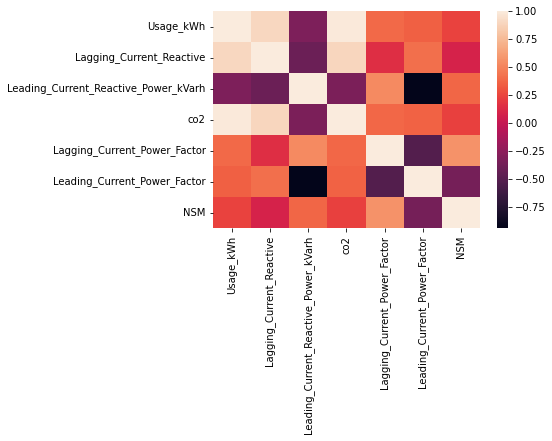

In [22]:
sns.heatmap(df.corr())

# **DATA PREPROCESSING**

In [23]:
# Checking if any rows are missing any data.
df.isnull().sum()

date                                    0
Usage_kWh                               0
Lagging_Current_Reactive                0
Leading_Current_Reactive_Power_kVarh    0
co2                                     0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64

In [24]:
df.duplicated().sum()

0

In [25]:
# Determine count of unique values for each column in the dataframe
df.nunique()

date                                    35040
Usage_kWh                                3343
Lagging_Current_Reactive                 1954
Leading_Current_Reactive_Power_kVarh      768
co2                                         8
Lagging_Current_Power_Factor             5079
Leading_Current_Power_Factor             3366
NSM                                        96
WeekStatus                                  2
Day_of_week                                 7
Load_Type                                   3
dtype: int64

In [26]:
print(f'Jumlah Baris Sebelum Outlier Dihapus: {len(df)}')
filtered_entries = np.array([True] * len(df))
for col in['Lagging_Current_Reactive',
       'Leading_Current_Reactive_Power_kVarh', 'co2',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor']:
    
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1

    min_IQR = q1 - (1.5 * iqr)
    max_IQR = q3 + (1.5 * iqr)

    filtered_entries=((df[col]>=min_IQR) & (df[col]<=max_IQR)) & filtered_entries
    df=df[filtered_entries]

print(f'Jumlah Baris Sebelum Outlier Dihapus: {len(df)}')

Jumlah Baris Sebelum Outlier Dihapus: 35040
Jumlah Baris Sebelum Outlier Dihapus: 23371


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


In [27]:
categorical1 = ['WeekStatus', 'Day_of_week', 'Load_Type']

In [28]:
for cat in categorical1:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)

In [29]:
df = df.set_index('date', append=False)

In [30]:
df_clean = df.drop(['WeekStatus', 'Day_of_week', 'Load_Type'],axis=1)
df_clean.sample(5)

,Usage_kWh,Lagging_Current_Reactive,Leading_Current_Reactive_Power_kVarh,co2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus_Weekday,WeekStatus_Weekend,Day_of_week_Friday,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Load_Type_Light_Load,Load_Type_Maximum_Load,Load_Type_Medium_Load
date,,,,,,,,,,,,,,,,,,,
25/10/2018 11:00,67.43,44.50,0.0,0.03,83.46,100.0,39600,1,0,0,0,0,0,1,0,0,0,1,0
04/05/2018 10:15,67.25,34.60,0.0,0.03,88.92,100.0,36900,1,0,1,0,0,0,0,0,0,0,1,0
26/03/2018 19:15,51.16,24.44,0.0,0.02,90.23,100.0,69300,1,0,0,1,0,0,0,0,0,0,0,1
30/05/2018 05:00,2.95,5.11,0.0,0.00,50.00,100.0,18000,1,0,0,0,0,0,0,0,1,1,0,0
29/01/2018 03:30,4.25,4.46,0.0,0.00,68.99,100.0,12600,1,0,0,1,0,0,0,0,0,1,0,0


In [31]:
X = df_clean.drop(columns='Usage_kWh') 
y = df_clean['Usage_kWh'] 

In [32]:
from sklearn.model_selection import train_test_split,cross_validate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [33]:
print(f'X_train Shape: {(X_train.shape)}')
print(f'y_train Shape: {(y_train.shape)}')
print(f'X_test Shape: {(X_test.shape)}')
print(f'y_test Shape: {(y_test.shape)}')

X_train Shape: (18696, 18)
y_train Shape: (18696,)
X_test Shape: (4675, 18)
y_test Shape: (4675,)


# **LINEAR REGRESSION**

In [34]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.978956291618086


In [35]:
r_sq = regr.score(X, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.9821551983401737


In [36]:
y_pred=regr.predict(X_test)
print(f"predicted:\n{y_pred}")

predicted:
[ 2.5595338   2.48230148 66.41549787 ...  4.7732468  48.02802551
  2.291982  ]


In [37]:
print(f"Coef: {regr.coef_}")
print(f"intercept: {regr.intercept_}")

Coef: [ 2.04657555e-01  2.32622774e+00  1.77557417e+03  8.89489906e-02
 -1.33582034e-12 -3.72852101e-06  2.55983874e-02 -2.55983874e-02
 -2.48398245e-03 -8.16875040e-02 -4.25671970e-02  1.69688097e-02
 -1.10704066e-01  3.01571371e-01 -8.10974306e-02 -9.09891908e-01
  2.24767505e-01  6.85124403e-01]
intercept: -2.0168921769242907


In [38]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error

# Training data
pred_train = regr.predict(X_train)
mae_train = mean_absolute_error(y_train, pred_train)
mse_train = mean_squared_error(y_train, pred_train)
rmse_train = np.sqrt(mse_train)
mape_train = mean_absolute_percentage_error(y_train, pred_train)

print("Data Train Performance Results:")
print('MAE training set', round(mae_train, 2))
print('MSE training set', round(mse_train, 2))
print('RMSE training set', round(rmse_train, 2))
print('MAPE training set', round(mape_train, 2))
print('\n')

# Test data
lr_pred = regr.predict(X_test)
mae_test = mean_absolute_error(y_test, lr_pred)
mse_test =mean_squared_error(y_test, lr_pred)
rmse_test = np.sqrt(mse_test)
mape_test = mean_absolute_percentage_error(y_test, lr_pred)

print("Data Test Performance Results:")
print('MAE test set', round(mae_test, 2))
print('MSE test set', round(mse_test, 2))
print('RMSE test set', round(rmse_test, 2))
print('MAPE test set', round(mape_test, 2))

Data Train Performance Results:
MAE training set 2.61
MSE training set 19.57
RMSE training set 4.42
MAPE training set 0.13


Data Test Performance Results:
MAE test set 2.66
MSE test set 24.41
RMSE test set 4.94
MAPE test set 0.12


# **LASSO**

In [39]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1)
lasso.fit(X_train, y_train)
print(lasso.score(X_test, y_test))

0.9020938968174589


In [40]:
lasso_pred=lasso.predict(X_test)
print(f"predicted:\n{lasso_pred}")

predicted:
[-1.93526599 -0.81173264 68.82235746 ... 17.24695518 62.57678257
 -3.10036264]


In [41]:
print('R squared training set', round(lasso.score(X_train, y_train)*100, 2))
print('R squared test set', round(lasso.score(X_test, y_test)*100, 2))

R squared training set 90.17
R squared test set 90.21


In [42]:
# Training data
pred_train = lasso.predict(X_train)
mae_train = mean_absolute_error(y_train, pred_train)
mse_train = mean_squared_error(y_train, pred_train)
rmse_train = np.sqrt(mse_train)
mape_train = mean_absolute_percentage_error(y_train, pred_train)

print("Data Train Performance Results:")
print('MAE training set', round(mae_train, 2))
print('MSE training set', round(mse_train, 2))
print('RMSE training set', round(rmse_train, 2))
print('MAPE training set', round(mape_train, 2))
print('\n')

# Test data
lasso_pred = lasso.predict(X_test)
mae_test = mean_absolute_error(y_test, lasso_pred)
mse_test =mean_squared_error(y_test, lasso_pred)
rmse_test = np.sqrt(mse_test)
mape_test = mean_absolute_percentage_error(y_test, lasso_pred)

print("Data Test Performance Results:")
print('MAE test set', round(mae_test, 2))
print('MSE test set', round(mse_test, 2))
print('RMSE test set', round(rmse_test, 2))
print('MAPE test set', round(mape_test, 2))

Data Train Performance Results:
MAE training set 7.8
MSE training set 112.92
RMSE training set 10.63
MAPE training set 0.9


Data Test Performance Results:
MAE test set 7.87
MSE test set 113.57
RMSE test set 10.66
MAPE test set 0.89


# **RIDGE**

In [43]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 1)
ridge.fit(X_train, y_train)
ridge.score(X_test, y_test)

0.9514734479801025

In [44]:
# Training data
pred_train = ridge.predict(X_train)
mae_train = mean_absolute_error(y_train, pred_train)
mse_train = mean_squared_error(y_train, pred_train)
rmse_train = np.sqrt(mse_train)
mape_train = mean_absolute_percentage_error(y_train, pred_train)

print("Data Train Performance Results:")
print('MAE training set', round(mae_train, 2))
print('MSE training set', round(mse_train, 2))
print('RMSE training set', round(rmse_train, 2))
print('MAPE training set', round(mape_train, 2))
print('\n')

# Test data
ridge_pred = ridge.predict(X_test)
mae_test = mean_absolute_error(y_test, ridge_pred)
mse_test =mean_squared_error(y_test, ridge_pred)
rmse_test = np.sqrt(mse_test)
mape_test = mean_absolute_percentage_error(y_test, ridge_pred)

print("Data Test Performance Results:")
print('MAE test set', round(mae_test, 2))
print('MSE test set', round(mse_test, 2))
print('RMSE test set', round(rmse_test, 2))
print('MAPE test set', round(mape_test, 2))

Data Train Performance Results:
MAE training set 5.33
MSE training set 56.82
RMSE training set 7.54
MAPE training set 0.53


Data Test Performance Results:
MAE test set 5.31
MSE test set 56.29
RMSE test set 7.5
MAPE test set 0.52


# **RF REGRESSOR**

In [45]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators = 1000,
                              criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
forest.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(criterion='mse', n_estimators=1000, n_jobs=-1,
                      random_state=1)

In [46]:
# Training data
forest_train_pred = forest.predict(X_train)
mae_train = mean_absolute_error(y_train, forest_train_pred)
mse_train = mean_squared_error(y_train, forest_train_pred)
rmse_train = np.sqrt(mse_train)
mape_train = mean_absolute_percentage_error(y_train, forest_train_pred)

print("Data Train Performance Results:")
print('MAE training set', round(mae_train, 2))
print('MSE training set', round(mse_train, 2))
print('RMSE training set', round(rmse_train, 2))
print('MAPE training set', round(mape_train, 2))
print('\n')

# Test data
forest_test_pred = forest.predict(X_test)
mae_test = mean_absolute_error(y_test, forest_test_pred)
mse_test =mean_squared_error(y_test, forest_test_pred)
rmse_test = np.sqrt(mse_test)
mape_test = mean_absolute_percentage_error(y_test, forest_test_pred)

print("Data Test Performance Results:")
print('MAE test set', round(mae_test, 2))
print('MSE test set', round(mse_test, 2))
print('RMSE test set', round(rmse_test, 2))
print('MAPE test set', round(mape_test, 2))

Data Train Performance Results:
MAE training set 0.1
MSE training set 0.1
RMSE training set 0.31
MAPE training set 0.0


Data Test Performance Results:
MAE test set 0.27
MSE test set 0.75
RMSE test set 0.87
MAPE test set 0.01


# **Support Vector Regression**

In [47]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train,y_train)

SVR()

In [48]:
# Training data
svr_train = regressor.predict(X_train)
mae_train = mean_absolute_error(y_train, svr_train)
mse_train = mean_squared_error(y_train, svr_train)
rmse_train = np.sqrt(mse_train)
mape_train = mean_absolute_percentage_error(y_train, svr_train)

print("Data Train Performance Results:")
print('MAE training set', round(mae_train, 2))
print('MSE training set', round(mse_train, 2))
print('RMSE training set', round(rmse_train, 2))
print('MAPE training set', round(mape_train, 2))
print('\n')

# Test data
svr_test = regressor.predict(X_test)
mae_test = mean_absolute_error(y_test, svr_test)
mse_test =mean_squared_error(y_test, svr_test)
rmse_test = np.sqrt(mse_test)
mape_test = mean_absolute_percentage_error(y_test, svr_test)

print("Data Test Performance Results:")
print('MAE test set', round(mae_test, 2))
print('MSE test set', round(mse_test, 2))
print('RMSE test set', round(rmse_test, 2))
print('MAPE test set', round(mape_test, 2))

Data Train Performance Results:
MAE training set 12.67
MSE training set 415.28
RMSE training set 20.38
MAPE training set 0.87


Data Test Performance Results:
MAE test set 12.83
MSE test set 426.12
RMSE test set 20.64
MAPE test set 0.86
